In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm

In [3]:
df = pd.read_csv('Datasets/us_airline_carrier_passenger.csv')
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


#### Visualize the Data

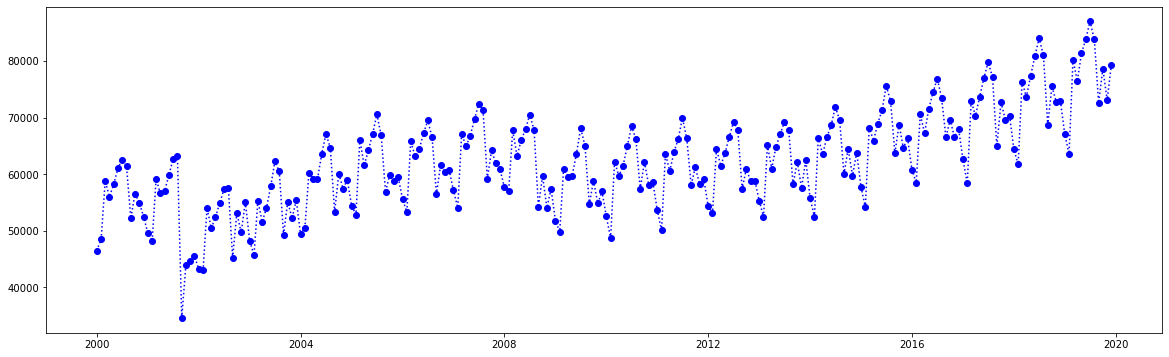

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df['month'], df['passengers'], 'o:', color='blue')
plt.show()

#### Splitting the Data into Train and Test
- Train : Upto 2016_DEC
- Test: 2016_DEC to 2019_DEC

In [7]:
import datetime

In [10]:
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]

In [11]:
df_train.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [12]:
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


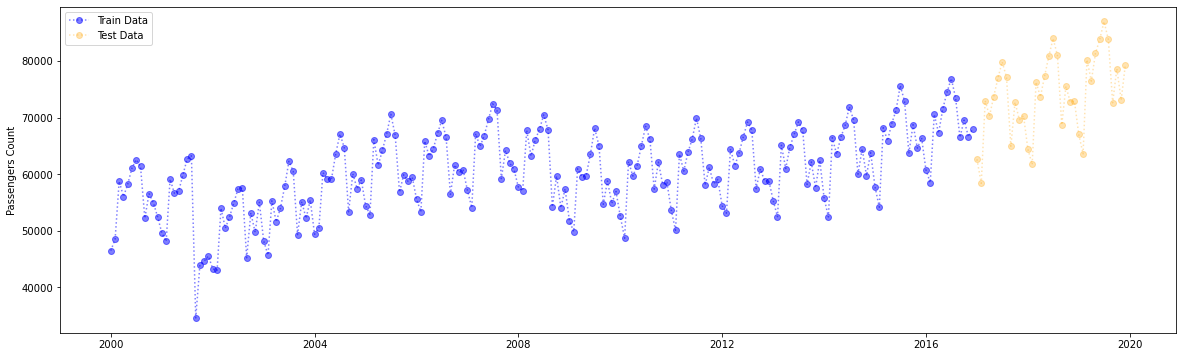

In [15]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'], df_train['passengers'], 'o:', alpha=0.5, color='blue')
plt.plot(df_test['month'], df_test['passengers'], 'o:', alpha=0.3, color='orange')
plt.legend(['Train Data', 'Test Data'])
plt.ylabel('Passengers Count')
plt.show()

#### ACF AND PACF

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

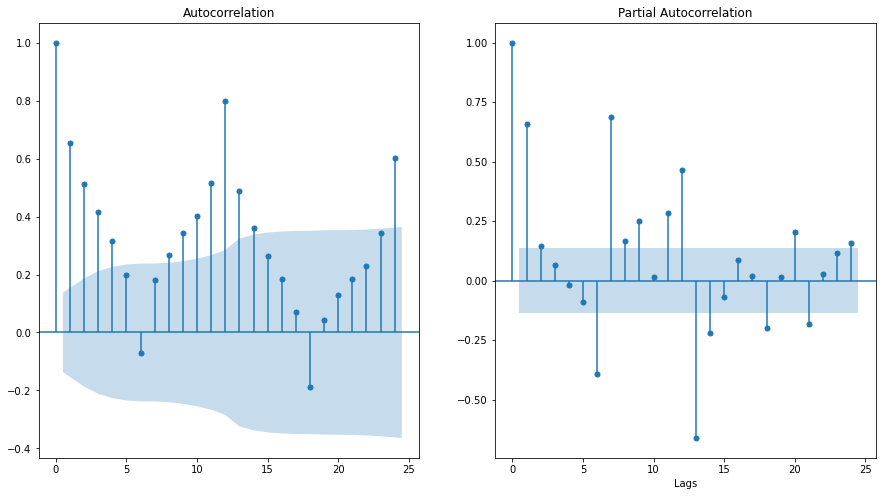

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
res1 = plot_acf(df_train['passengers'], ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(df_train['passengers'], ax=ax[1])
plt.xlabel('Lags')
plt.show()

#### Making Data Stationary

In [19]:
difference = df_train['passengers'].diff()

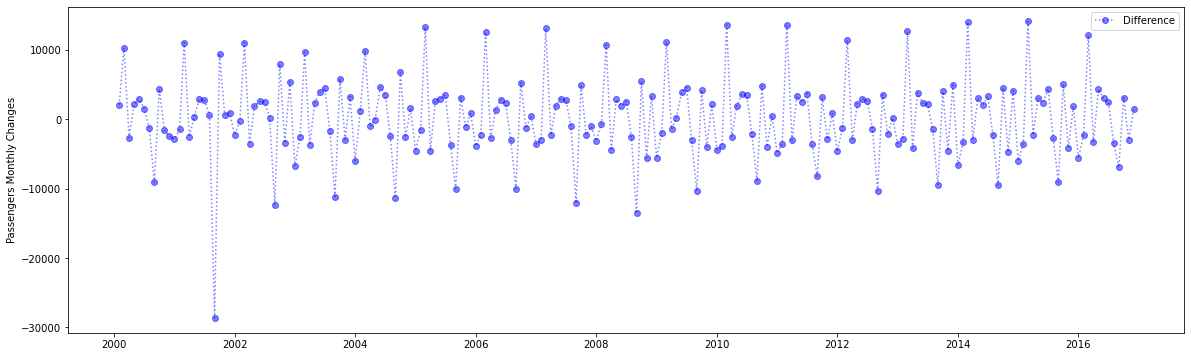

In [20]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'], difference, 'o:', alpha=0.5, color='blue')
# plt.plot(df_test['month'], df_test['passengers'], 'o:', alpha=0.3, color='orange')
plt.legend(['Difference'])
plt.ylabel('Passengers Monthly Changes')
plt.show()

In [21]:
difference.dropna(inplace=True)

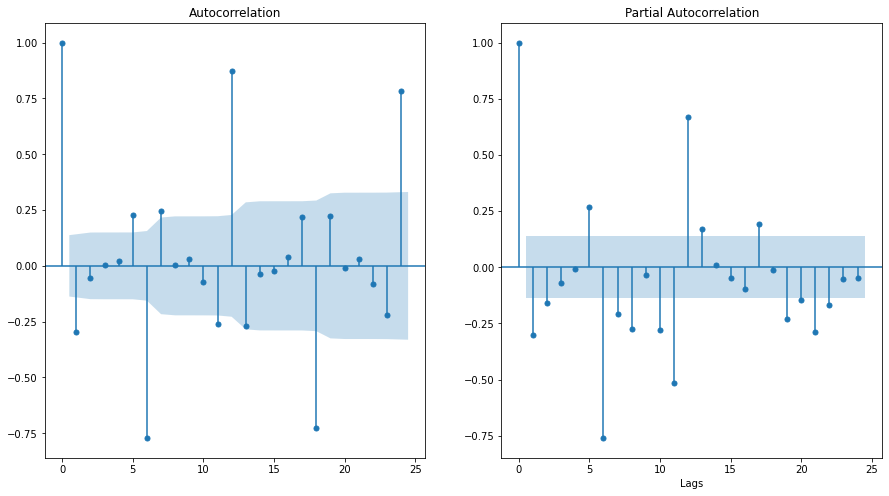

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
res1 = plot_acf(difference, ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(difference, ax=ax[1])
plt.xlabel('Lags')
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [24]:
lag_acf = acf(difference, nlags=20)
lag_pacf = pacf(difference, nlags=20, method='ols')

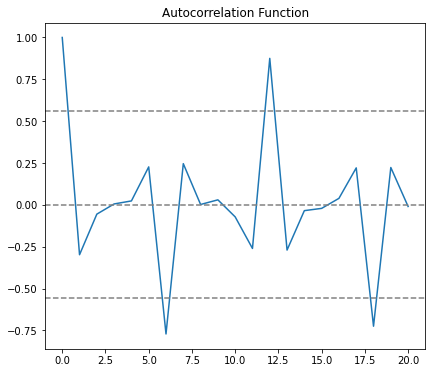

In [25]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(difference)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(difference)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

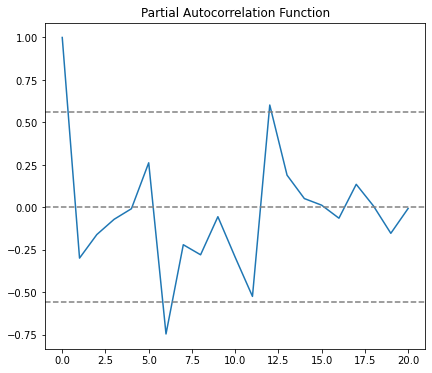

In [26]:
plt.figure(figsize=(15, 6))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(difference)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(difference)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [30]:
X_train = df_train.set_index('month')
X_test = df_test.set_index('month')

In [31]:
from statsmodels.tsa.ar_model import AutoReg

In [32]:
model_ar = AutoReg(X_train, lags=12).fit()

In [33]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:             passengers   No. Observations:                  204
Model:                    AutoReg(12)   Log Likelihood               -1791.208
Method:               Conditional MLE   S.D. of innovations           2725.128
Date:                Wed, 05 May 2021   AIC                             15.966
Time:                        11:11:25   BIC                             16.204
Sample:                    01-01-2001   HQIC                            16.063
                         - 12-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept      -1101.8877   2670.461     -0.413      0.680   -6335.894    4132.119
passengers.L1      0.4234      0.062      6.848      0.000       0.302       0.545
passengers.L2      0.0487      0.069

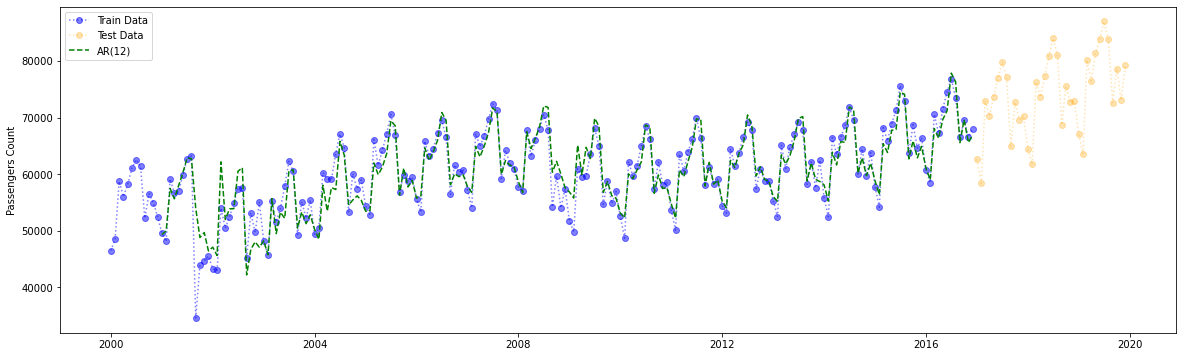

In [35]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'], df_train['passengers'], 'o:', alpha=0.5, color='blue')
plt.plot(df_test['month'], df_test['passengers'], 'o:', alpha=0.3, color='orange')
# Fitted Values
plt.plot(model_ar.fittedvalues, 'g--')
plt.legend(['Train Data', 'Test Data', 'AR(12)'])
plt.ylabel('Passengers Count')
plt.show()

In [36]:
start = datetime.datetime.strptime('2017-01-01', '%Y-%m-%d')
end = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
forecast_values = model_ar.predict(start, end)

In [37]:
forecast_values

2017-01-01    63865.557371
2017-02-01    63222.994100
2017-03-01    70781.913370
2017-04-01    68039.617829
2017-05-01    71141.883579
2017-06-01    72824.770971
2017-07-01    77109.403231
2017-08-01    76000.490028
2017-09-01    69455.981515
2017-10-01    71568.661351
2017-11-01    68506.271522
2017-12-01    68818.970854
2018-01-01    65306.675289
2018-02-01    65442.430918
2018-03-01    71502.458374
2018-04-01    69488.794302
2018-05-01    72034.333260
2018-06-01    72740.657482
2018-07-01    77027.417514
2018-08-01    76976.500851
2018-09-01    71753.813164
2018-10-01    73465.299203
2018-11-01    70817.627629
2018-12-01    70692.274180
2019-01-01    67089.480987
2019-02-01    67137.204703
2019-03-01    72109.495937
2019-04-01    70753.833398
2019-05-01    73078.695929
2019-06-01    73431.418190
2019-07-01    77408.178644
2019-08-01    77765.340526
2019-09-01    73650.014767
2019-10-01    75054.000818
2019-11-01    72913.246811
2019-12-01    72789.053910
Freq: MS, dtype: float64

In [38]:
forecast_values.head()

2017-01-01    63865.557371
2017-02-01    63222.994100
2017-03-01    70781.913370
2017-04-01    68039.617829
2017-05-01    71141.883579
Freq: MS, dtype: float64

In [40]:
ME = 1.96 * model_ar.resid.std()

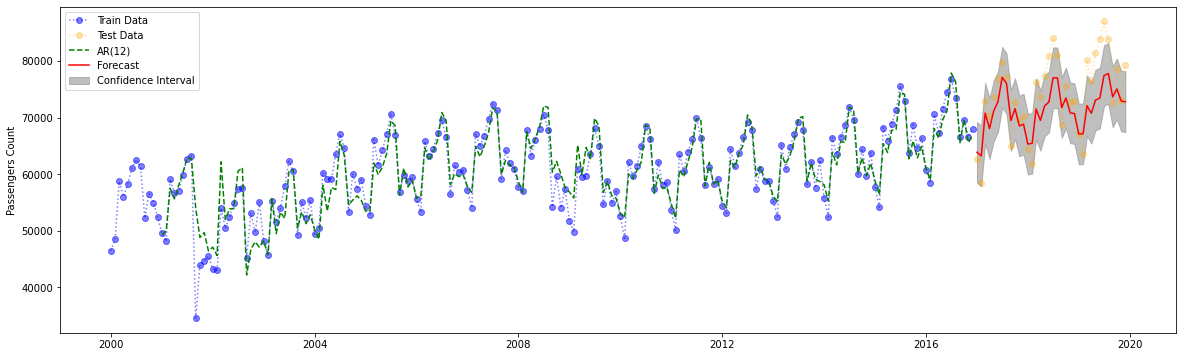

In [41]:
plt.figure(figsize=(20,6))
plt.plot(df_train['month'], df_train['passengers'], 'o:', alpha=0.5, color='blue')
plt.plot(df_test['month'], df_test['passengers'], 'o:', alpha=0.3, color='orange')
# Fitted Values
plt.plot(model_ar.fittedvalues, 'g--')
# Forecasted Values
plt.plot(forecast_values, 'r-')
# Confidence Interval
plt.fill_between(df_test['month'], (forecast_values.values+ME), (forecast_values.values-ME), alpha=0.5, color='gray')
plt.legend(['Train Data', 'Test Data', 'AR(12)', 'Forecast', 'Confidence Interval'])
plt.ylabel('Passengers Count')
plt.show()

#### Evaluation

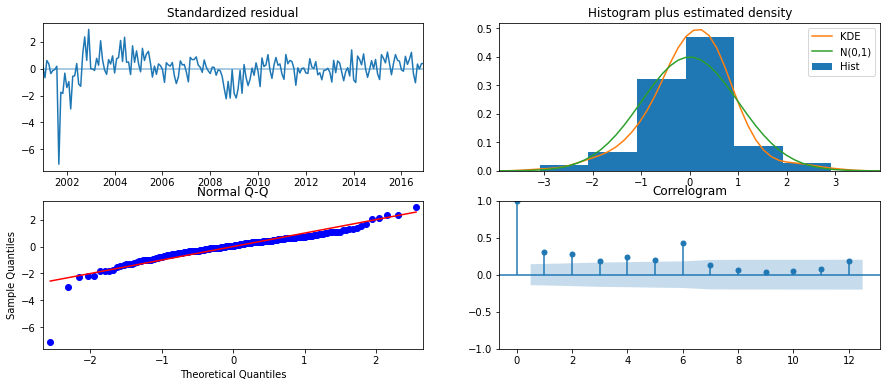

In [43]:
fig = plt.figure(figsize=(15,6))
fig = model_ar.plot_diagnostics(lags=12, fig=fig)